<a href="https://colab.research.google.com/github/dhdbsrlw/MLVU/blob/main/hw1_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
"""
Change directory to where this file is located
"""
%cd /content/drive/MyDrive/AI/VIP Lab/Homework 1

/content/drive/MyDrive/AI/VIP Lab/Homework 1


## Import Modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

## Beta Distribution

In [40]:
class BetaDistribution:
    """ class for modeling Beta distribution over alpha, beta"""

    def __init__(self, a=0.5, b=0.5):
        """
        Initializes the model parameters: alpha and beta.

        Do NOT Modify this method.

        Inputs
        - a: alpha
        - b: beta
        """
        self.a = a
        self.b = b

    def forward(self, X):
        """
        forward pass of the model.

        Do NOT Modify this method.

        Inputs
        - X: a numpy array of training data of the shape (N,)
        Returns
        - outputs: the probability of X following the beta distribution defined by the model parameters.
        """
        beta_func = special.beta(self.a, self.b)
        outputs = 1/beta_func * np.power(X, self.a-1) * np.power(1-X, self.b-1)
        return outputs

    # 문제
    def compute_loss(self, X):
        """
        Computes the loss for gradient descent using the log-likelihood of the model.

        Question (a)
        - hint: use special.beta for beta function.

        Inputs
        - X: a numpy array of training data of the shape (N,)
        Returns
        - loss: a float of loss
        """
        N = len(X)

        X = np.clip(X, 1e-10, 1 - 1e-10) # log 관련 Warning 해결

        beta_func = special.beta(self.a, self.b)
        loss = N * np.log(beta_func) - (self.a-1) * np.sum(np.log(X)) - (self.b-1) * np.sum(np.log(1-X))

        return -loss


    # 문제
    def backward(self, X):
        """
        Computes the gradients of the loss function with respect to the model parameters.

        Question (b)
        - hint: use special.polygamma for psi function.

        Inputs
        - X: a numpy array of training data of the shape (N,)
        Returns
        - gradients: a dictionary containing 'alpha' and 'beta' as keys with their corrresponding gradients as values.
        """
        N = len(X)
        psi_a = special.polygamma(0, self.a)
        psi_b = special.polygamma(0, self.b)
        psi_ab = special.polygamma(0, self.a + self.b)

        grad_a = N * (psi_a - psi_ab) - np.sum(np.log(X))
        grad_b = N * (psi_b - psi_ab) - np.sum(np.log(1 - X))

        gradients = {'alpha': -grad_a, 'beta': -grad_b}
        return gradients


    def train(self, X, lr, n_epochs, log_interval=10):
        """
        Runs gradient descent

        Do NOT Modify this method.

        Inputs
        - X
        - lr
        - n_epochs
        - log_interval
        Returns
        - history
        """
        history = []
        for epoch in range(n_epochs):
            self.train_step(X, lr)
            if epoch % log_interval==0:
                loss = self.compute_loss(X)
                history.append((loss, self.a, self.b))
        return history

    # 문제
    def train_step(self, X, lr):
        """
        Updates the parameters using gradient descent

        Question (c)

        Inputs
        - X
        - lr: learning rate
        """
        # Backward 를 통해 파라미터 업데이트
        # Gradient 계산
        gradients = self.backward(X)

        # 파라미터 업데이트
        self.a -= lr * gradients['alpha']
        self.b -= lr * gradients['beta']


## Gradient Descent for Parameter Estimation

In [ ]:
###
# Question (d)
# Run a gradient descent, and plot the training history.
# You will have a reasonable plot if your implementation of the model is right.
###

In [41]:
# sample data from beta distribution
alpha, beta, size = 2, 3, 500
X = np.random.beta(alpha, beta, size=size)

# model instantiation
model = BetaDistribution(a=0.5, b=0.5)

# train the model
lr, n_epochs = 0.1, 1500
history = model.train(X, lr, n_epochs, log_interval=10)

<ipython-input-40-20e1bb81ac81>:50: RuntimeWarning: invalid value encountered in log
  loss = N * np.log(beta_func) - (self.a-1) * np.sum(np.log(X)) - (self.b-1) * np.sum(np.log(1-X))
<ipython-input-40-20e1bb81ac81>:50: RuntimeWarning: divide by zero encountered in log
  loss = N * np.log(beta_func) - (self.a-1) * np.sum(np.log(X)) - (self.b-1) * np.sum(np.log(1-X))


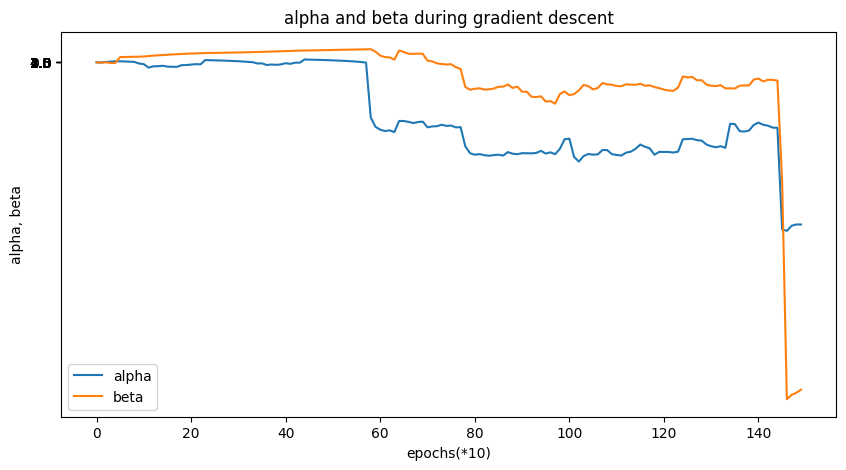

In [42]:
# visualize gradient descent history
losses, alphas, betas = list(zip(*history))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set(title="alpha and beta during gradient descent")
ax.set(xlabel='epochs(*10)', ylabel='alpha, beta')
ax.plot(alphas)
ax.plot(betas)
ax.set(yticks=np.arange(0,max(alpha,beta)+2,0.5))
ax.legend(['alpha', 'beta'])
plt.show()

## Experiment

In [ ]:
###
# Question (e)
# Run gradient descents 100 times, and plot the histograms of alphas and betas.
# You will have a reasonable plot if your implementation of the model is right.
###

In [43]:
lr = 0.1
n_epochs = 1000
n_experiments = 100
alpha, beta, size = 2, 3, 500

In [44]:
alphas = []
betas = []
for exp_id in range(n_experiments):
    X = np.random.beta(alpha, beta, size=size)
    model = BetaDistribution(a=0.5, b=0.5)
    history = model.train(X, lr, n_epochs)
    alphas.append(model.a)
    betas.append(model.b)

<ipython-input-40-20e1bb81ac81>:50: RuntimeWarning: invalid value encountered in log
  loss = N * np.log(beta_func) - (self.a-1) * np.sum(np.log(X)) - (self.b-1) * np.sum(np.log(1-X))
<ipython-input-40-20e1bb81ac81>:50: RuntimeWarning: divide by zero encountered in log
  loss = N * np.log(beta_func) - (self.a-1) * np.sum(np.log(X)) - (self.b-1) * np.sum(np.log(1-X))


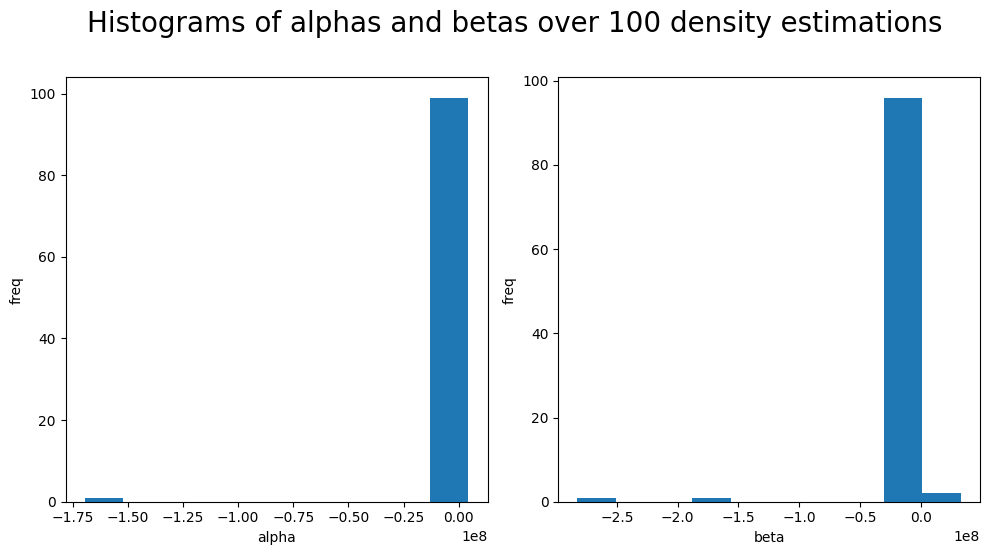

In [45]:
# Visualize the result
fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].hist(alphas)
axes[0].set(title="")
axes[0].set(xlabel='alpha', ylabel='freq')

axes[1].hist(betas)
axes[1].set(title="")
axes[1].set(xlabel='beta', ylabel='freq')

fig.tight_layout()
plt.suptitle("Histograms of alphas and betas over 100 density estimations", x=0.52, y=1.1, size=20, weight=1)
plt.show()